In [23]:
%%time
print("start")
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"
%run -i "datagathering"


#get collection of documents (minute of podcast) in a list
main="https://www.happyscribe.com/public/lex-fridman-podcast-artificial-intelligence-ai/"
transfolder ="3Lex/"
timesfolder="lextimestamps2/"
url="101-joscha-bach-artificial-consciousness-and-the-nature-of-reality"
file = "#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
write_specific(main, url, transfolder)
document_size = 2700
topic_size = 1700
filter_size=16

soup = BeautifulSoup(requests.get(main+url).text,"html.parser")
sents = list(map(contractions.fix, re.split("(?<=[.?!])\s", open(transfolder+file).read())))


dictionary, model = generate_model(transfolder+file, document_size, topic_size)
one_topic_confi = load_confidences(transfolder+file, topic_size, dictionary, model, sents, basic_completion) #generate initial topics + confidences, then smooth by filling in empty values and averaging


algo_stamps = get_algo_timestamps(one_topic_confi, filter_size) #algo generated timestamps
actual_stamps = get_real_timestamps(soup, sents, timesfolder, file) #description generated timestamps


# print("# Timestamp difference:",len(actual_stamps))

start
CPU times: user 5.19 s, sys: 1.14 s, total: 6.34 s
Wall time: 10.8 s


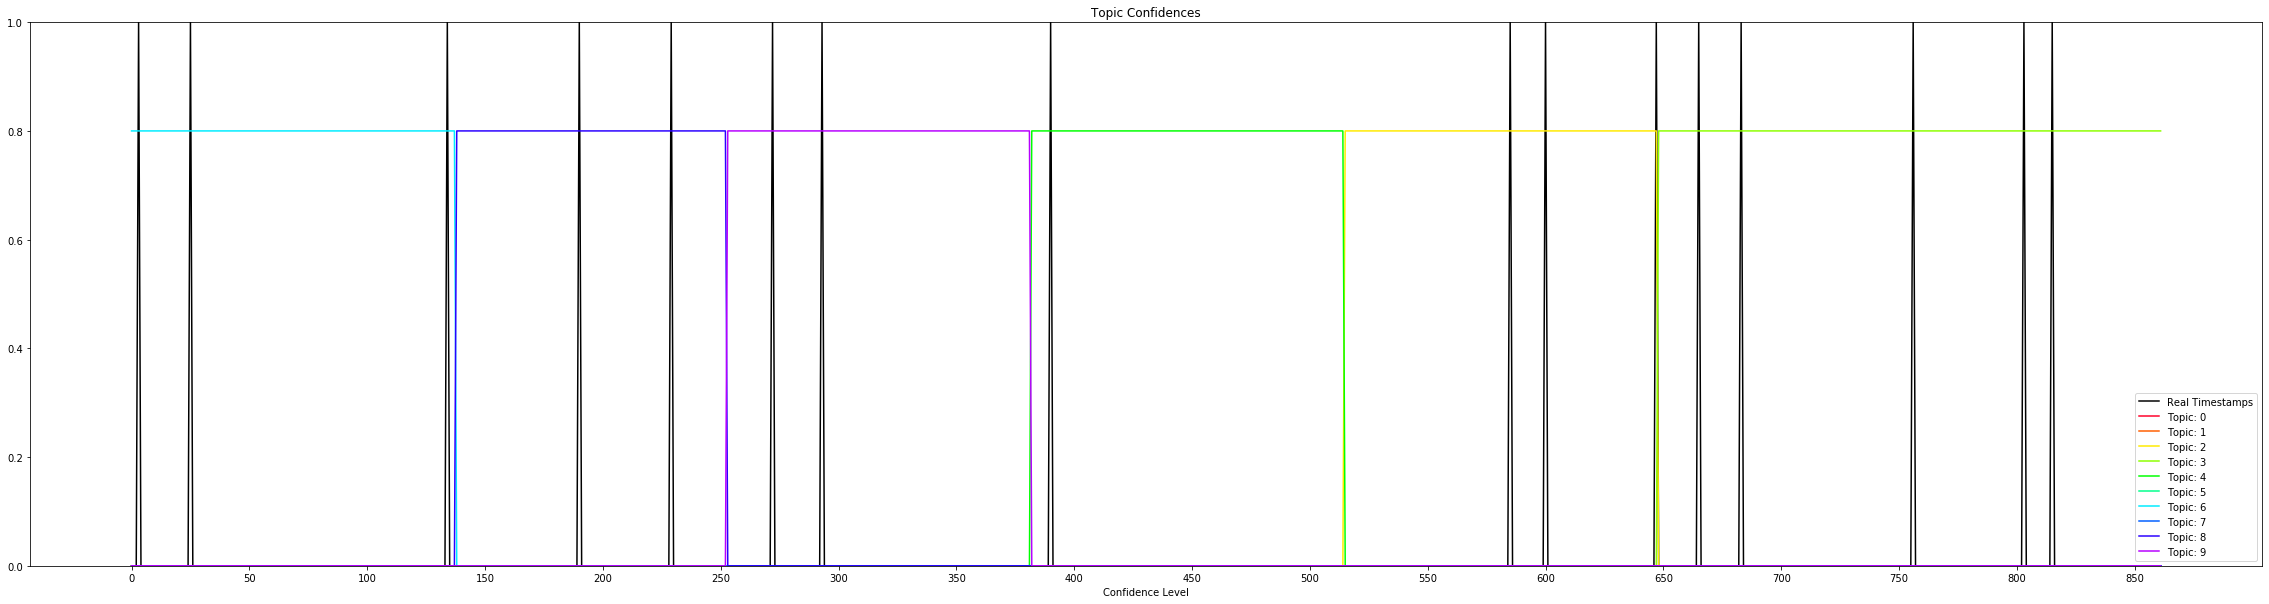

In [21]:
final_topic_confi = get_final_topic_confi(sents, algo_stamps) #new topic graph based on algo timestamps
top_confi = np.zeros([int(pod_word_count(transfolder+file)/topic_size), len(sents)])

NUM_COLORS = int(pod_word_count(transfolder+file)/topic_size)

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xticks(np.arange(0, len(sents), 50))
plt.xlabel("Confidence Level")
plt.ylim(0,1)

r1, r2 = 0, len(sents)
# r1, r2 = 150, 200
x = np.arange(0, len(sents))
plt.plot(x[r1:r2], convert_to_gra(actual_stamps, sents)[r1:r2], label="Real Timestamps", color="black") #graph original timestamps in black
# plt.plot(x[r1:r2], final_topic_confi[r1:r2], label="Model", color="dimgrey")



for ind, i in enumerate(final_topic_confi): #set graph
    top_confi[int(i)][ind] = .8
    
for i in range(int(pod_word_count(transfolder+file)/topic_size)): #graph the timestamps as according to algorithm, each color corresponds to a new topic
    plt.plot(x[r1:r2],top_confi[i][r1:r2], label="Topic: "+str(i))

plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

In [ ]:
topic_errors = []
for i in tqdm(range(500,3000, 100)):
    topic_errors.append((i, sample_error(i)))

In [8]:
%%time
for i in topic_errors:
    print(i)

(500, 9)
(600, 11)
(700, 9)
(800, 8)
(900, 9)
(1000, 6)
(1100, 7)
(1200, 8)
(1300, 8)
(1400, 8)
(1500, 8)
(1600, 7)
(1700, 3)
(1800, 7)
(1900, 4)
(2000, 10)
(2100, 11)
(2200, 11)
(2300, 5)
(2400, 6)
(2500, 7)
(2600, 6)
(2700, 5)
(2800, 6)
(2900, 5)
CPU times: user 1.05 ms, sys: 219 µs, total: 1.27 ms
Wall time: 835 µs


In [18]:
topic_arr = np.array(topic_errors)
for i in range(len(topic_arr)):
    topic_arr[i][0] = pod_word_count(transfolder+file)/topic_arr[i][0]
print(topic_arr)

[[65  9]
 [54 11]
 [46  9]
 [40  8]
 [36  9]
 [32  6]
 [29  7]
 [27  8]
 [25  8]
 [23  8]
 [21  8]
 [20  7]
 [19  3]
 [18  7]
 [17  4]
 [16 10]
 [15 11]
 [14 11]
 [14  5]
 [13  6]
 [13  7]
 [12  6]
 [12  5]
 [11  6]
 [11  5]]


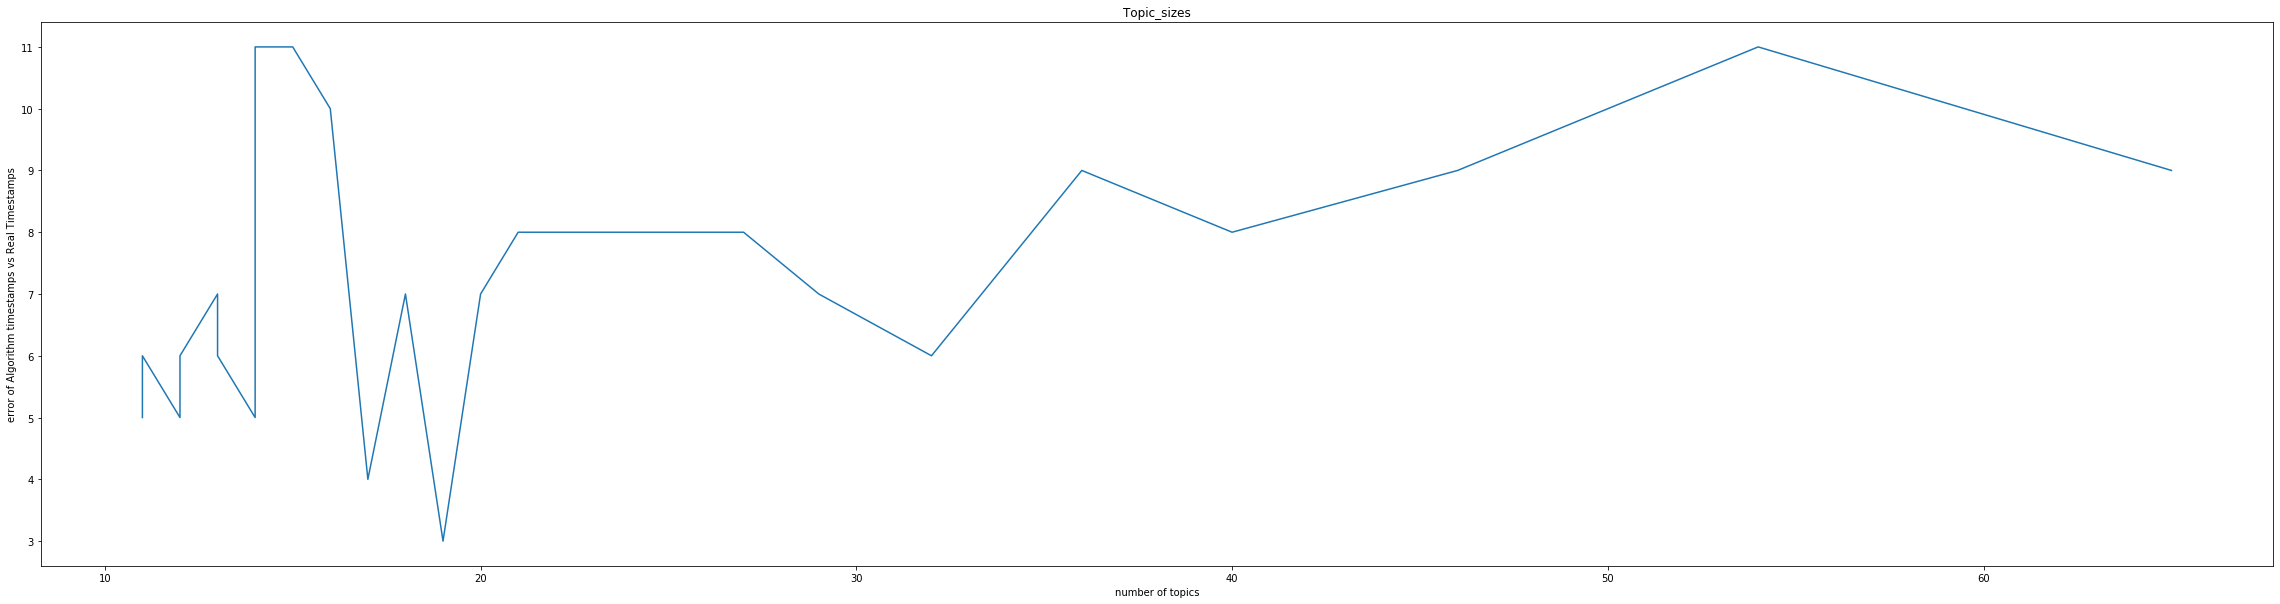

In [20]:
plt.title("Topic_sizes")
plt.ylabel("error of Algorithm timestamps vs Real Timestamps")
plt.xlabel("number of topics")
plt.plot(topic_arr[:,0], topic_arr[:,1])

In [ ]:
document_errors = []
for i in tqdm(range(500,3000, 100)):
    document_errors.append((i, sample_error(i)))

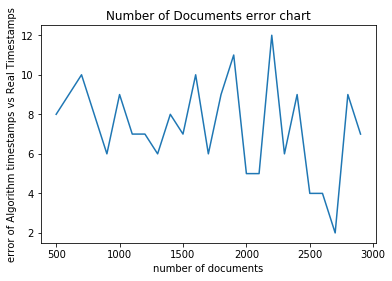

In [10]:
plt.title("Number of Documents error chart")
plt.ylabel("error of Algorithm timestamps vs Real Timestamps")
plt.xlabel("number of documents")
plt.plot(doc_arr[:,0], doc_arr[:,1])

In [ ]:
%%time
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = list(tqdm(executor.map(sample_error, [i for i in range(500, 3000, 100)])))
topic_results = list(results)

In [20]:
for i in algo_stamps:
    print(sents[i[0]])

The following is a conversation with Sergei Levine, a professor at Berkeley and a world class researcher in Deep Learning, reinforcement, learning, robotics and computer vision, including the development of algorithms for end to end training of neural network policies that combine perception and control scalable algorithms for inverse reinforcement learning and in general, deep RL algorithms.
Robotics we are trying to solve?
But actually since then, people have gotten really good at building systems to solve this problem to the point where I am not actually sure how much more progress we can make with that as like the main guiding thing.
And then I was kind of trying to get to is that also if you add to the reward function, the convincing ness of that story.
Well, I think it makes sense when you take some time to think about it, but it is a little surprising or then then taking a step into the more deeper representations, which is also very surprising to sort of the richness of the sta